In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Cargamos los datos con los que hemos estado trabajando

datos = np.load('test_line.npy')

In [22]:
#Definimos las funciones necesarias para el algoritmo

def recta(x, a, b):
    return a*x + b

def likelihood(valores, a, b):
    x = valores[0]
    y = valores[1]
    err = valores[2]
    modelo = recta(x, a, b)
    lh = - 0.5*np.sum(((y - modelo)**2)/((err)**2))
    return lh

def prior_a(a):
    c = 15
    d = 45
    W = d - c
    if a >= c and a <= d:
        p_a = 1/W
    else:
        p_a = 0
    return p_a

def prior_b(b):
    c = 160
    d = 200
    W = d - c
    if b >= c and b <= d:
        p_b = 1/W
    else:
        p_b = 0
    return p_b

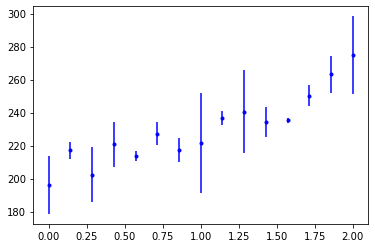

<Figure size 3600x2160 with 0 Axes>

In [23]:
plt.errorbar(datos[0], datos[1], datos[2], None, color = 'blue', fmt = '.')
plt.figure(figsize=(50,30))
plt.show()

<ipython-input-28-0544b78acf4e>:13: RuntimeWarning: divide by zero encountered in log
  posterior_new = likelihood(datos, a_new, b_new) + np.log(prior_a(a_new)) + np.log(prior_b(b_new))


24.067722129308365
199.83391196463344


Text(0, 0.5, 'b')

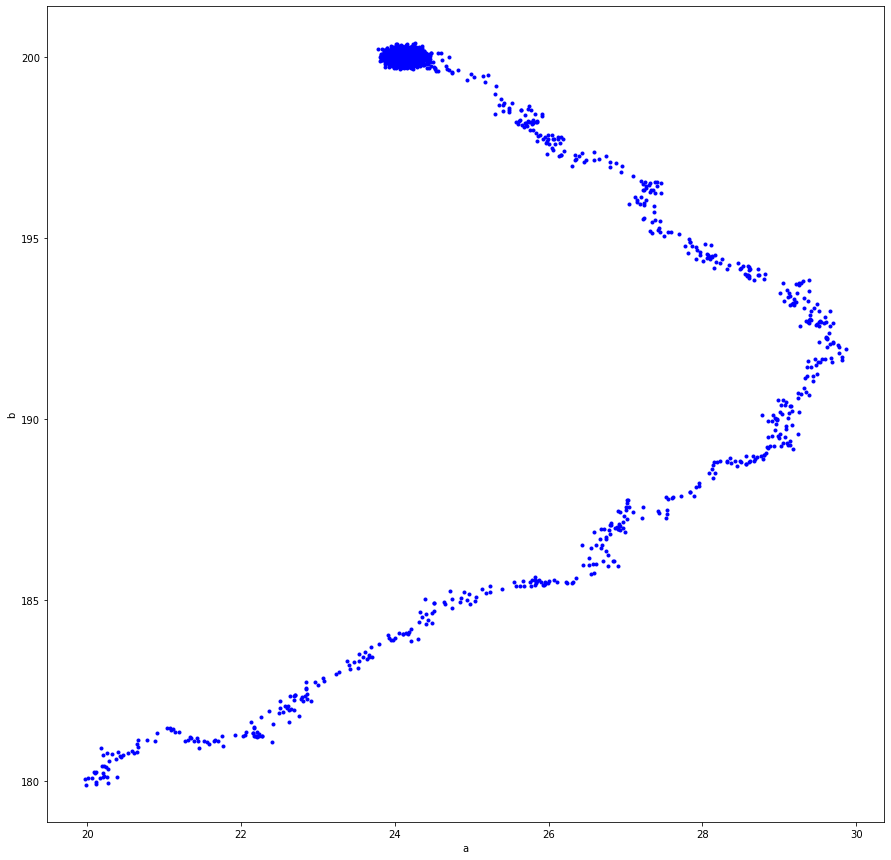

In [28]:
#Definimos entonces el posterior (logarítmico) para nuestros datos en fit_exercise.npy

a = 20
b = 180
posterior = likelihood(datos, a, b) + np.log(prior_a(a)) + np.log(prior_b(b))

a_lista = []
b_lista = []

for i in range(6000):
    a_new = np.random.normal(a, 0.1)
    b_new = np.random.normal(b, 0.1)
    posterior_new = likelihood(datos, a_new, b_new) + np.log(prior_a(a_new)) + np.log(prior_b(b_new))
    if posterior_new > posterior:
        a_lista.append(a_new)
        b_lista.append(b_new)
        a = a_new
        b = b_new
        posterior = posterior_new
    else:
        random = np.random.random()
        if posterior_new - posterior > random:
            a_lista.append(a_new)
            b_lista.append(b_new)
            a = a_new
            b = b_new
            posterior = posterior_new
        else:
            a_lista.append(a_new)
            b_lista.append(b_new)
            
print(a_new)
print(b_new)
plt.figure(figsize=(15,15))
plt.plot(a_lista, b_lista, '.', color = 'blue')
plt.xlabel('a')
plt.ylabel('b')

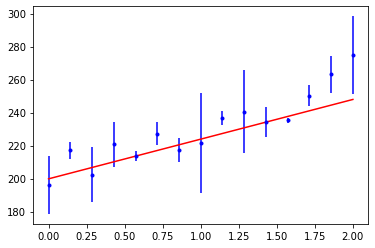

<Figure size 3600x2160 with 0 Axes>

In [29]:
x = np.linspace(0, 2, 100)
plt.plot(x, a_new*x + b_new, color = 'red')
plt.errorbar(datos[0], datos[1], datos[2], None, color = 'blue', fmt = '.')
plt.figure(figsize=(50,30))
plt.show()

In [30]:
datos

array([[ 0.00000000e+00,  1.42857143e-01,  2.85714286e-01,
         4.28571429e-01,  5.71428571e-01,  7.14285714e-01,
         8.57142857e-01,  1.00000000e+00,  1.14285714e+00,
         1.28571429e+00,  1.42857143e+00,  1.57142857e+00,
         1.71428571e+00,  1.85714286e+00,  2.00000000e+00],
       [ 1.96248739e+02,  2.17109545e+02,  2.02438147e+02,
         2.20817965e+02,  2.13819395e+02,  2.27251238e+02,
         2.17515781e+02,  2.21388623e+02,  2.36648800e+02,
         2.40642358e+02,  2.34123099e+02,  2.35261971e+02,
         2.50209093e+02,  2.63271434e+02,  2.74829289e+02],
       [ 1.76815884e+01, -5.03133689e+00,  1.65857792e+01,
         1.37444076e+01,  2.87670665e+00,  6.82112915e+00,
         7.36724007e+00,  3.03301838e+01,  4.29012660e+00,
         2.52042751e+01, -9.21174822e+00, -1.65378113e+00,
        -6.43187287e+00,  1.12999903e+01,  2.35848953e+01]])